In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import statistics
import math
import numpy as np
from scipy.stats import rankdata

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
count_file = '/content/drive/Shareddrives/CSCI5461 Homework/HW1_CSCI5461_Spring2023/HW1-GSE62944-count.csv'
clinical_file = '/content/drive/Shareddrives/CSCI5461 Homework/HW1_CSCI5461_Spring2023/HW1-GSE62944-clinical.csv'
de_seq_file = '/content/drive/Shareddrives/CSCI5461 Homework/HW1_CSCI5461_Spring2023/HW1-DESeq2.csv'

In [4]:
#setting plot size params
plt.rcParams["figure.figsize"] = (20,10)

## **Question 1**

In [5]:
count_data = pd.read_csv(count_file)
clinical_data = pd.read_csv(clinical_file)

In [6]:
count_data

,Unnamed: 0,TCGA-02-2483-01A-01R-1849-01,TCGA-02-2485-01A-01R-1849-01,TCGA-02-2486-01A-01R-1849-01,TCGA-06-0129-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-06-0184-01A-01R-1849-01,TCGA-06-0644-01A-02R-1849-01,TCGA-06-0645-01A-01R-1849-01,TCGA-06-0646-01A-01R-1849-01,...,TCGA-32-1980-01A-01R-1850-01,TCGA-32-2615-01A-01R-1850-01,TCGA-32-2616-01A-01R-1850-01,TCGA-32-2632-01A-01R-1850-01,TCGA-41-2571-01A-01R-1850-01,TCGA-41-2572-01A-01R-1850-01,TCGA-41-4097-01A-01R-1850-01,TCGA-76-4927-01A-01R-1850-01,TCGA-76-4928-01B-01R-1850-01,TCGA-76-4931-01A-01R-1850-01
0,1/2-SBSRNA4,51,35,26,93,144,34,48,30,103,...,39,71,27,42,73,42,52,29,55,65
1,A1BG,784,162,203,373,2048,280,598,442,508,...,385,956,861,203,1204,1189,303,274,273,114
2,A1BG-AS1,51,27,25,96,49,21,46,41,67,...,87,125,99,22,101,85,55,21,22,28
3,A1CF,1,1,1,4,3,1,3,2,2,...,2,4,2,1,7,2,2,1,2,2
4,A2LD1,91,319,339,129,79,272,402,184,418,...,248,277,520,433,114,454,172,240,210,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,ZYG11B,3125,2491,1258,4043,1773,1675,1573,1887,2405,...,2873,2335,2838,1581,2001,2139,1345,1527,2314,2833
23364,ZYX,14291,12796,15071,11782,5350,19715,38265,30441,19149,...,9985,16278,62673,9951,14345,30473,7891,12706,51102,20501
23365,ZZEF1,2229,2688,1210,5602,565,1477,2172,2351,4472,...,2253,3624,2550,1990,3670,2007,2592,2106,3036,4219
23366,ZZZ3,1835,1660,1029,3125,1014,1302,1699,1090,1473,...,1237,1908,2525,1002,613,775,946,888,1462,1497


## **Question 2**

In [7]:
#2a)
count_data.shape[0]

23368

In [8]:
#2b)
clinical_data.shape[0]

154

In [9]:
#2b)
short_term_patients = clinical_data[(clinical_data['Group'] == 'short' )]
len(short_term_patients)

76

In [10]:
#2b)
long_term_patients = clinical_data[(clinical_data['Group'] == 'long' )]
len(long_term_patients)

78

## **Question 3a)**

In [11]:
#3a)

# Get sum of all rows as a new row in Dataframe
sum = count_data.sum()
sum.name = 'Sum'
# Assign sum of all rows of DataFrame as a new Row
count_data = count_data.append(sum.transpose())

In [12]:
count_data

,Unnamed: 0,TCGA-02-2483-01A-01R-1849-01,TCGA-02-2485-01A-01R-1849-01,TCGA-02-2486-01A-01R-1849-01,TCGA-06-0129-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-06-0184-01A-01R-1849-01,TCGA-06-0644-01A-02R-1849-01,TCGA-06-0645-01A-01R-1849-01,TCGA-06-0646-01A-01R-1849-01,...,TCGA-32-1980-01A-01R-1850-01,TCGA-32-2615-01A-01R-1850-01,TCGA-32-2616-01A-01R-1850-01,TCGA-32-2632-01A-01R-1850-01,TCGA-41-2571-01A-01R-1850-01,TCGA-41-2572-01A-01R-1850-01,TCGA-41-4097-01A-01R-1850-01,TCGA-76-4927-01A-01R-1850-01,TCGA-76-4928-01B-01R-1850-01,TCGA-76-4931-01A-01R-1850-01
0,1/2-SBSRNA4,51,35,26,93,144,34,48,30,103,...,39,71,27,42,73,42,52,29,55,65
1,A1BG,784,162,203,373,2048,280,598,442,508,...,385,956,861,203,1204,1189,303,274,273,114
2,A1BG-AS1,51,27,25,96,49,21,46,41,67,...,87,125,99,22,101,85,55,21,22,28
3,A1CF,1,1,1,4,3,1,3,2,2,...,2,4,2,1,7,2,2,1,2,2
4,A2LD1,91,319,339,129,79,272,402,184,418,...,248,277,520,433,114,454,172,240,210,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23364,ZYX,14291,12796,15071,11782,5350,19715,38265,30441,19149,...,9985,16278,62673,9951,14345,30473,7891,12706,51102,20501
23365,ZZEF1,2229,2688,1210,5602,565,1477,2172,2351,4472,...,2253,3624,2550,1990,3670,2007,2592,2106,3036,4219
23366,ZZZ3,1835,1660,1029,3125,1014,1302,1699,1090,1473,...,1237,1908,2525,1002,613,775,946,888,1462,1497
23367,tAKR,0,1,0,0,3,0,0,0,0,...,0,1,1,0,1,0,0,0,3,0


In [13]:
sample_names = count_data.columns.values.tolist()[1:]


In [14]:
total_read_counts_per_sample = list(count_data.values[-1:].flatten()[1:])

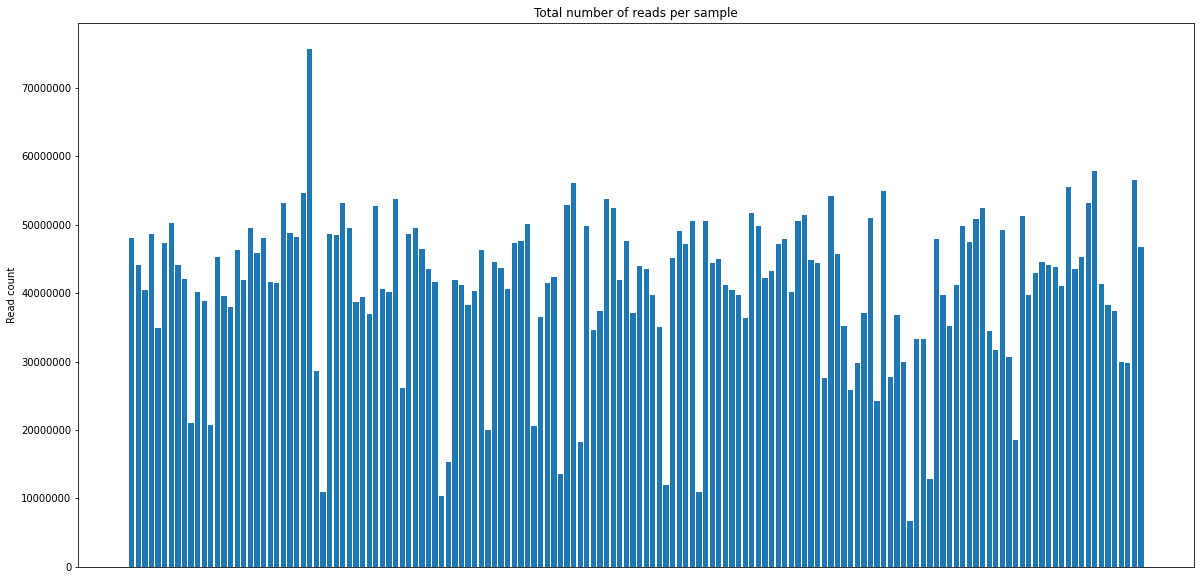

In [15]:
plt.bar(sample_names, total_read_counts_per_sample)
plt.title('Total number of reads per sample')
plt.xlabel('Sample name')
plt.ylabel('Read count')
#get current axes
ax = plt.gca()
#hide x-axis
ax.get_xaxis().set_visible(False)
ax.yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [16]:
last_row = len(count_data)
count_data = count_data.drop(count_data.index[last_row-1])

## **Question 3b)**

In [17]:
N_median = statistics.median(total_read_counts_per_sample) # get median number of total reads across all samples

total_count_norm = count_data.copy()

In [18]:
for i in range(0, len(sample_names)):
  sample_name = sample_names[i]
  N_i = total_read_counts_per_sample[i]
  total_count_norm[sample_name] = total_count_norm[sample_name].apply(lambda x: x*(N_median/N_i))

In [19]:
total_count_norm

,Unnamed: 0,TCGA-02-2483-01A-01R-1849-01,TCGA-02-2485-01A-01R-1849-01,TCGA-02-2486-01A-01R-1849-01,TCGA-06-0129-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-06-0184-01A-01R-1849-01,TCGA-06-0644-01A-02R-1849-01,TCGA-06-0645-01A-01R-1849-01,TCGA-06-0646-01A-01R-1849-01,...,TCGA-32-1980-01A-01R-1850-01,TCGA-32-2615-01A-01R-1850-01,TCGA-32-2616-01A-01R-1850-01,TCGA-32-2632-01A-01R-1850-01,TCGA-41-2571-01A-01R-1850-01,TCGA-41-2572-01A-01R-1850-01,TCGA-41-4097-01A-01R-1850-01,TCGA-76-4927-01A-01R-1850-01,TCGA-76-4928-01B-01R-1850-01,TCGA-76-4931-01A-01R-1850-01
0,1/2-SBSRNA4,45.767693,34.191514,27.687162,82.325204,177.659600,30.992732,41.159802,29.309041,105.649585,...,37.145781,57.530667,20.124026,43.851821,82.317059,48.405675,74.795041,41.966088,41.943963,59.940388
1,A1BG,703.566103,158.257864,216.172842,330.186035,2526.714309,255.234266,512.782538,431.819876,521.067856,...,366.695529,774.638272,641.732832,211.950466,1357.667650,1370.341622,435.824949,396.507174,208.194578,105.126218
2,A1BG-AS1,45.767693,26.376311,26.622271,84.980856,60.453614,19.142570,39.444811,40.055690,68.723516,...,82.863665,101.286385,73.788096,22.970001,113.890725,97.963867,79.110139,30.389236,16.777585,25.820475
3,A1CF,0.897406,0.976900,1.064891,3.540869,3.701242,0.911551,2.572488,1.953936,2.051448,...,1.904912,3.241164,1.490669,1.044091,7.893417,2.305032,2.876732,1.447106,1.525235,1.844320
4,A2LD1,81.663923,311.631226,360.997998,114.193025,97.466030,247.941858,344.713345,179.762120,428.752685,...,236.209068,224.450629,387.573836,452.091388,128.549927,523.242301,247.398981,347.305554,160.149675,280.336582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,ZYG11B,2804.392950,2433.458887,1339.632689,3578.933344,2187.433823,1526.847839,1348.841025,1843.538700,2466.866523,...,2736.405855,1892.029670,2115.258743,1650.707815,2256.389508,2465.231900,1934.602497,2209.731585,1764.696899,2612.478736
23364,ZYX,12824.825488,12500.417468,16048.969995,10429.629647,6600.547632,17971.226952,32812.079980,29739.884248,19641.591287,...,9510.272351,13189.918186,46712.336576,10389.749189,16175.865815,35120.622569,11350.147435,18386.934850,38971.279574,18905.198226
23365,ZZEF1,2000.317403,2625.908265,1288.517928,4958.987038,697.067180,1346.360751,1862.481059,2296.851873,4587.038291,...,2145.883185,2936.494871,1900.602465,2077.741020,4138.405545,2313.099777,3728.245109,3047.606233,2315.306735,3890.592230
23366,ZZZ3,1646.739540,1621.654657,1095.772684,2766.303908,1251.019682,1186.839335,1456.885506,1064.895169,1510.891637,...,1178.187972,1546.035379,1881.969107,1046.179147,691.237765,893.199964,1360.694395,1285.030548,1114.946788,1380.473233


In [20]:
# Get sum of all normalized rows as a new row in Dataframe
sum_norm = total_count_norm.sum()
sum_norm.name = 'Normalized Sum'
# Assign sum of all rows of DataFrame as a new Row
total_count_norm = total_count_norm.append(sum_norm.transpose())

In [21]:
total_count_norm

,Unnamed: 0,TCGA-02-2483-01A-01R-1849-01,TCGA-02-2485-01A-01R-1849-01,TCGA-02-2486-01A-01R-1849-01,TCGA-06-0129-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-06-0184-01A-01R-1849-01,TCGA-06-0644-01A-02R-1849-01,TCGA-06-0645-01A-01R-1849-01,TCGA-06-0646-01A-01R-1849-01,...,TCGA-32-1980-01A-01R-1850-01,TCGA-32-2615-01A-01R-1850-01,TCGA-32-2616-01A-01R-1850-01,TCGA-32-2632-01A-01R-1850-01,TCGA-41-2571-01A-01R-1850-01,TCGA-41-2572-01A-01R-1850-01,TCGA-41-4097-01A-01R-1850-01,TCGA-76-4927-01A-01R-1850-01,TCGA-76-4928-01B-01R-1850-01,TCGA-76-4931-01A-01R-1850-01
0,1/2-SBSRNA4,4.576769e+01,3.419151e+01,2.768716e+01,8.232520e+01,1.776596e+02,3.099273e+01,4.115980e+01,2.930904e+01,1.056496e+02,...,3.714578e+01,5.753067e+01,2.012403e+01,4.385182e+01,8.231706e+01,4.840568e+01,7.479504e+01,4.196609e+01,4.194396e+01,5.994039e+01
1,A1BG,7.035661e+02,1.582579e+02,2.161728e+02,3.301860e+02,2.526714e+03,2.552343e+02,5.127825e+02,4.318199e+02,5.210679e+02,...,3.666955e+02,7.746383e+02,6.417328e+02,2.119505e+02,1.357668e+03,1.370342e+03,4.358249e+02,3.965072e+02,2.081946e+02,1.051262e+02
2,A1BG-AS1,4.576769e+01,2.637631e+01,2.662227e+01,8.498086e+01,6.045361e+01,1.914257e+01,3.944481e+01,4.005569e+01,6.872352e+01,...,8.286366e+01,1.012864e+02,7.378810e+01,2.297000e+01,1.138907e+02,9.796387e+01,7.911014e+01,3.038924e+01,1.677759e+01,2.582047e+01
3,A1CF,8.974057e-01,9.769004e-01,1.064891e+00,3.540869e+00,3.701242e+00,9.115509e-01,2.572488e+00,1.953936e+00,2.051448e+00,...,1.904912e+00,3.241164e+00,1.490669e+00,1.044091e+00,7.893417e+00,2.305032e+00,2.876732e+00,1.447106e+00,1.525235e+00,1.844320e+00
4,A2LD1,8.166392e+01,3.116312e+02,3.609980e+02,1.141930e+02,9.746603e+01,2.479419e+02,3.447133e+02,1.797621e+02,4.287527e+02,...,2.362091e+02,2.244506e+02,3.875738e+02,4.520914e+02,1.285499e+02,5.232423e+02,2.473990e+02,3.473056e+02,1.601497e+02,2.803366e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23364,ZYX,1.282483e+04,1.250042e+04,1.604897e+04,1.042963e+04,6.600548e+03,1.797123e+04,3.281208e+04,2.973988e+04,1.964159e+04,...,9.510272e+03,1.318992e+04,4.671234e+04,1.038975e+04,1.617587e+04,3.512062e+04,1.135015e+04,1.838693e+04,3.897128e+04,1.890520e+04
23365,ZZEF1,2.000317e+03,2.625908e+03,1.288518e+03,4.958987e+03,6.970672e+02,1.346361e+03,1.862481e+03,2.296852e+03,4.587038e+03,...,2.145883e+03,2.936495e+03,1.900602e+03,2.077741e+03,4.138406e+03,2.313100e+03,3.728245e+03,3.047606e+03,2.315307e+03,3.890592e+03
23366,ZZZ3,1.646740e+03,1.621655e+03,1.095773e+03,2.766304e+03,1.251020e+03,1.186839e+03,1.456886e+03,1.064895e+03,1.510892e+03,...,1.178188e+03,1.546035e+03,1.881969e+03,1.046179e+03,6.912378e+02,8.932000e+02,1.360694e+03,1.285031e+03,1.114947e+03,1.380473e+03
23367,tAKR,0.000000e+00,9.769004e-01,0.000000e+00,0.000000e+00,3.701242e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,8.102911e-01,7.453343e-01,0.000000e+00,1.127631e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.287853e+00,0.000000e+00


In [22]:
total_norm_read_counts_per_sample = list(total_count_norm.values[-1:].flatten()[1:])

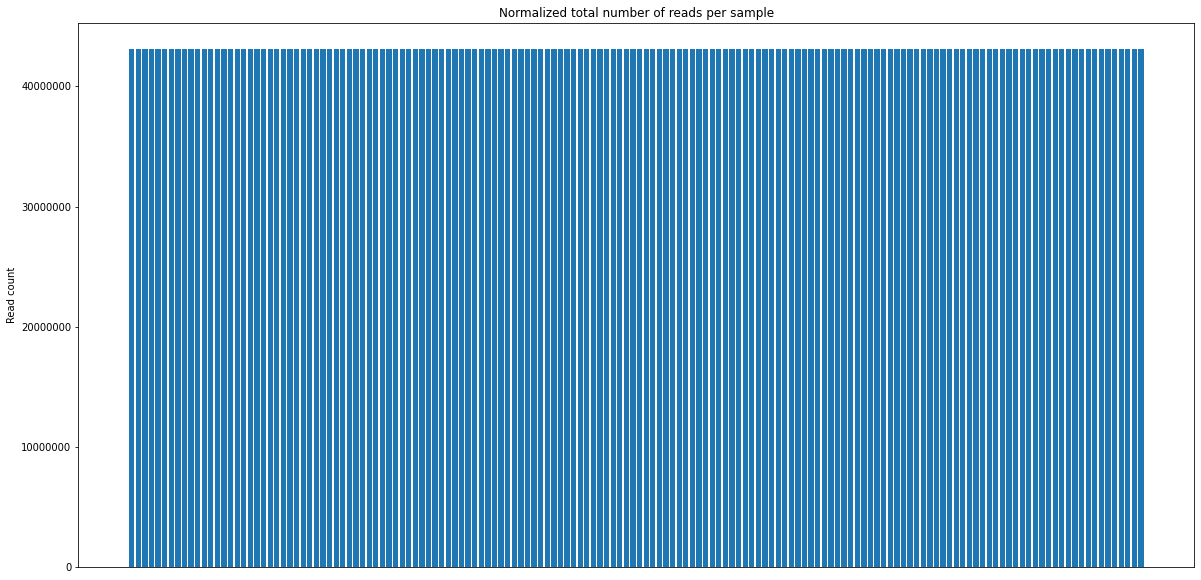

In [23]:
# Check again
plt.bar(sample_names, total_norm_read_counts_per_sample)
plt.title('Normalized total number of reads per sample')
plt.xlabel('Sample name')
plt.ylabel('Read count')
#get current axes
ax = plt.gca()
#hide x-axis
ax.get_xaxis().set_visible(False)
ax.yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [24]:
total_count_norm = total_count_norm.drop(total_count_norm.index[last_row-1])

## **Question 3 c)**

In [25]:
log_transformed_data = total_count_norm.copy()

In [26]:
for i in range(0, len(sample_names)):
  sample_name = sample_names[i]
  log_transformed_data[sample_name] = log_transformed_data[sample_name].apply(lambda x: math.log(x + 1))

In [27]:
log_transformed_data

,Unnamed: 0,TCGA-02-2483-01A-01R-1849-01,TCGA-02-2485-01A-01R-1849-01,TCGA-02-2486-01A-01R-1849-01,TCGA-06-0129-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-06-0184-01A-01R-1849-01,TCGA-06-0644-01A-02R-1849-01,TCGA-06-0645-01A-01R-1849-01,TCGA-06-0646-01A-01R-1849-01,...,TCGA-32-1980-01A-01R-1850-01,TCGA-32-2615-01A-01R-1850-01,TCGA-32-2616-01A-01R-1850-01,TCGA-32-2632-01A-01R-1850-01,TCGA-41-2571-01A-01R-1850-01,TCGA-41-2572-01A-01R-1850-01,TCGA-41-4097-01A-01R-1850-01,TCGA-76-4927-01A-01R-1850-01,TCGA-76-4928-01B-01R-1850-01,TCGA-76-4931-01A-01R-1850-01
0,1/2-SBSRNA4,3.845193,3.560805,3.356450,4.422751,5.185482,3.465509,3.741467,3.411446,4.669549,...,3.641415,4.069551,3.050411,3.803364,4.422653,3.900065,4.328033,3.760411,3.759896,4.109896
1,A1BG,6.557582,5.070525,5.380694,5.802680,7.835071,5.546092,6.241800,6.070322,6.257798,...,5.907255,6.653686,6.465729,5.361060,7.214260,7.223545,6.079533,5.985213,5.343265,4.664629
2,A1BG-AS1,3.845193,3.309678,3.318622,4.454125,4.118283,3.002835,3.699938,3.714929,4.244538,...,4.429192,4.627777,4.314659,3.176803,4.743981,4.594755,4.383402,3.446465,2.877938,3.289166
3,A1CF,0.640488,0.681530,0.725077,1.513118,1.547827,0.647915,1.273262,1.083139,1.115616,...,1.066403,1.444838,0.912551,0.714953,2.185311,1.195446,1.354993,0.894906,0.926334,1.045324
4,A2LD1,4.414783,5.745024,5.891639,4.746609,4.589712,5.517219,5.845610,5.197182,6.063210,...,5.468942,5.418101,5.962483,6.116094,4.864066,6.261954,5.515036,5.853080,5.082334,5.639552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,ZYG11B,7.939299,7.797480,7.200897,8.183099,7.690941,7.331615,7.207742,7.519984,7.811109,...,7.914766,7.545934,7.657405,7.409565,7.721964,7.810447,7.568174,7.701079,7.476301,7.868437
23364,ZYX,9.459216,9.433597,9.683462,9.252502,8.795059,9.796583,10.398582,10.300278,9.885456,...,9.160233,9.487284,10.751785,9.248671,9.691337,10.466572,9.337074,9.819450,10.570606,9.847245
23365,ZZEF1,7.601561,7.873563,7.162024,8.509158,6.548315,7.205903,7.530202,7.739730,8.431208,...,7.671772,7.985312,7.550452,7.639518,8.328307,7.746776,8.223961,8.022440,7.747729,8.266574
23366,ZZZ3,7.407160,7.391819,7.000127,7.925629,7.132513,7.079891,7.284742,6.971570,7.321117,...,7.072581,7.344096,7.540605,6.953855,6.539929,6.795929,7.216485,7.159316,7.017458,7.230906


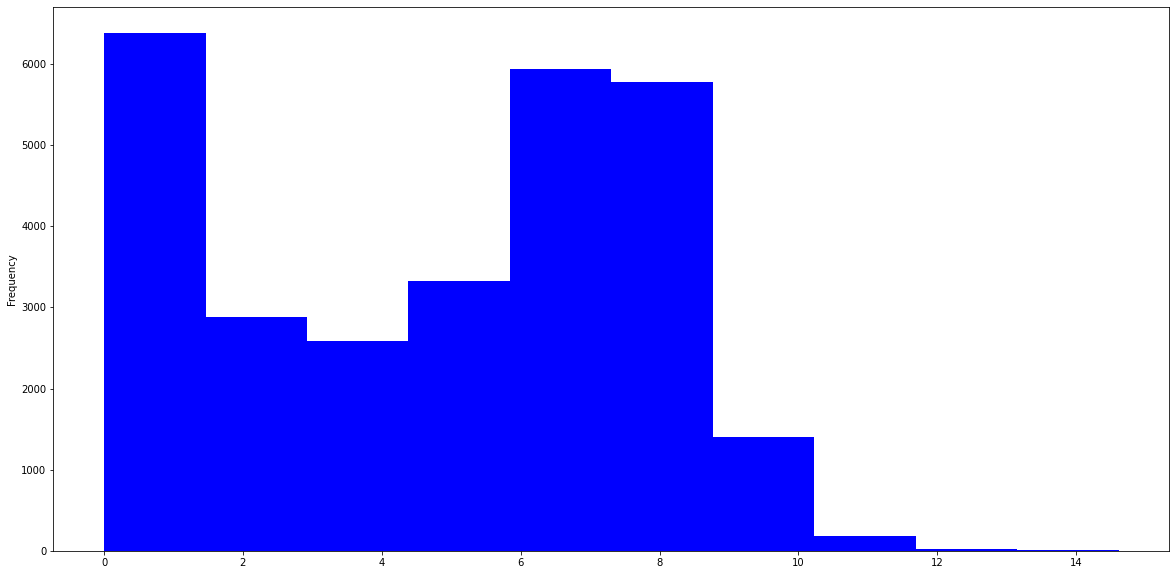

In [28]:
log_transformed_data.plot.hist(grid=False, color = 'Blue')
plt.legend('', frameon=False)
plt.show()

## **Question 3 d)**

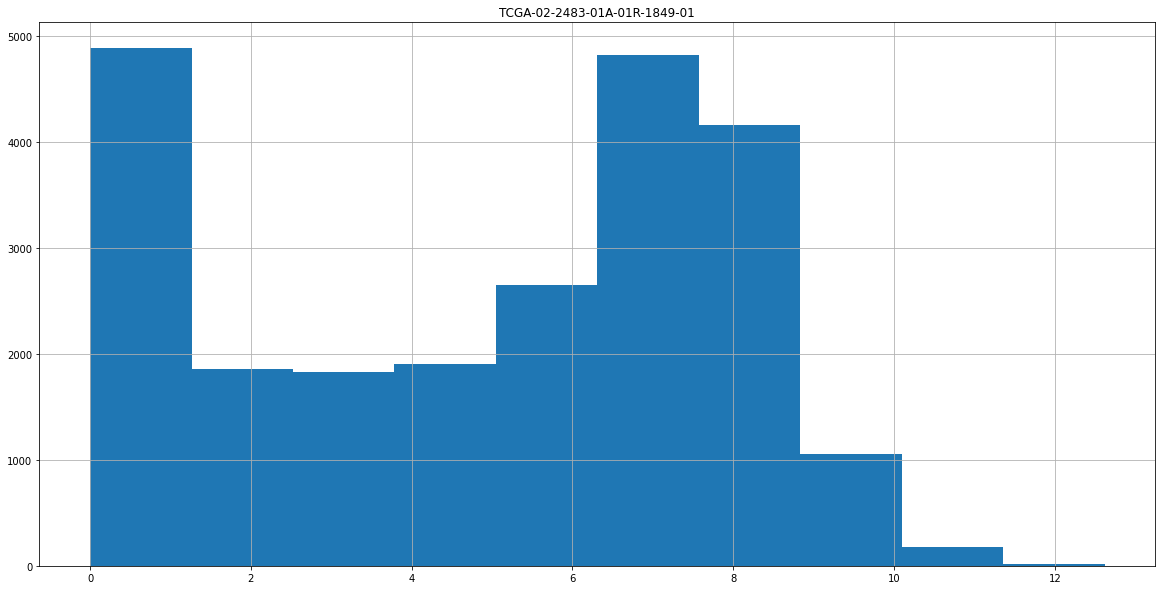

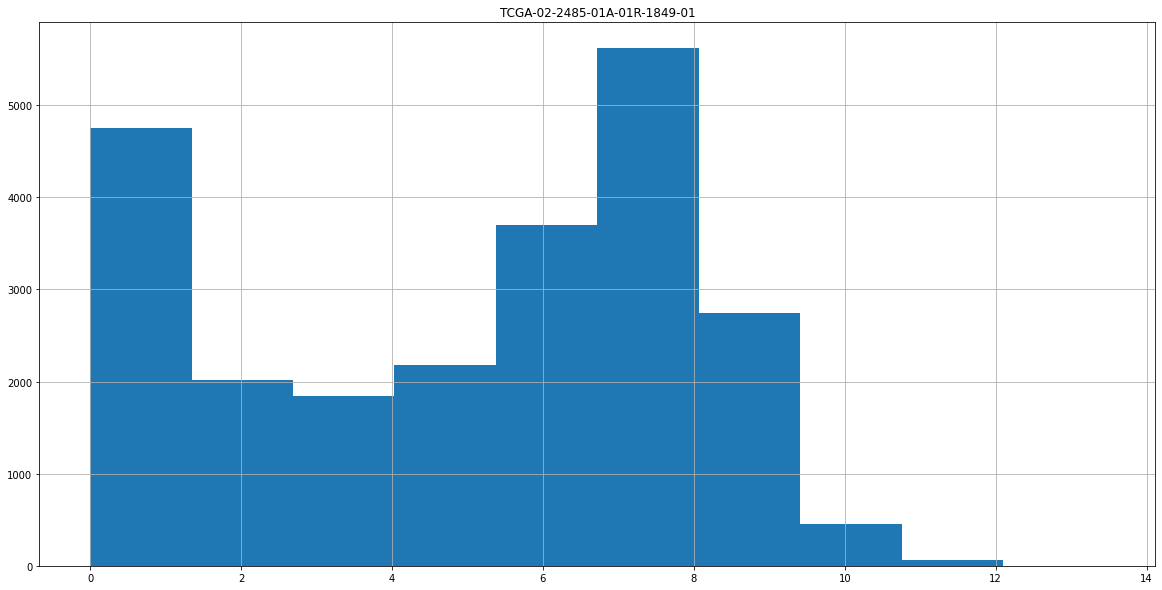

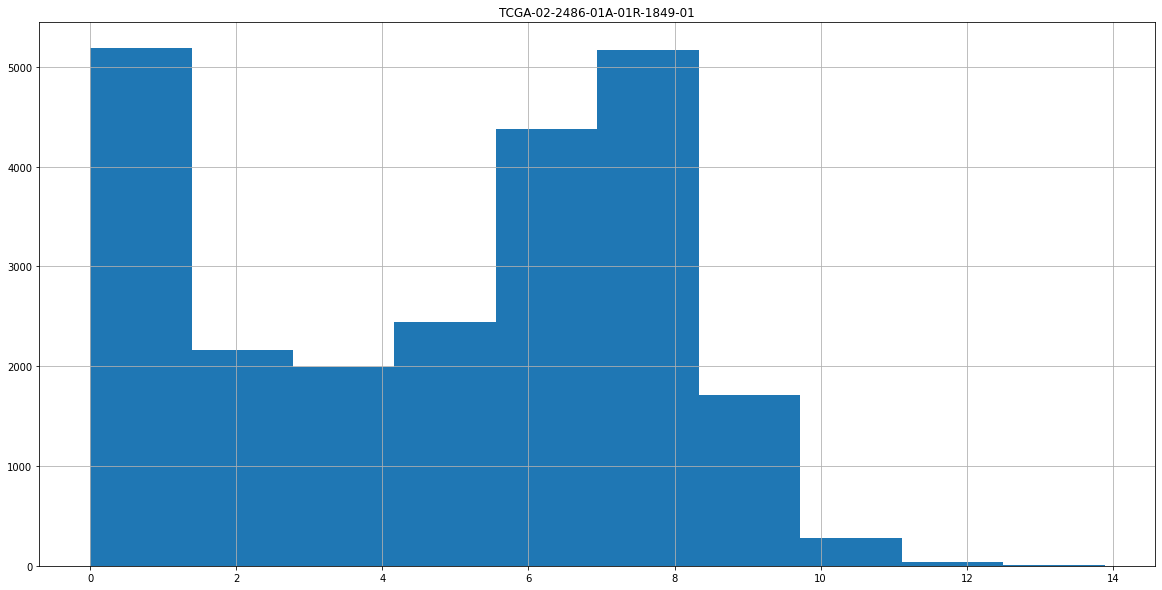

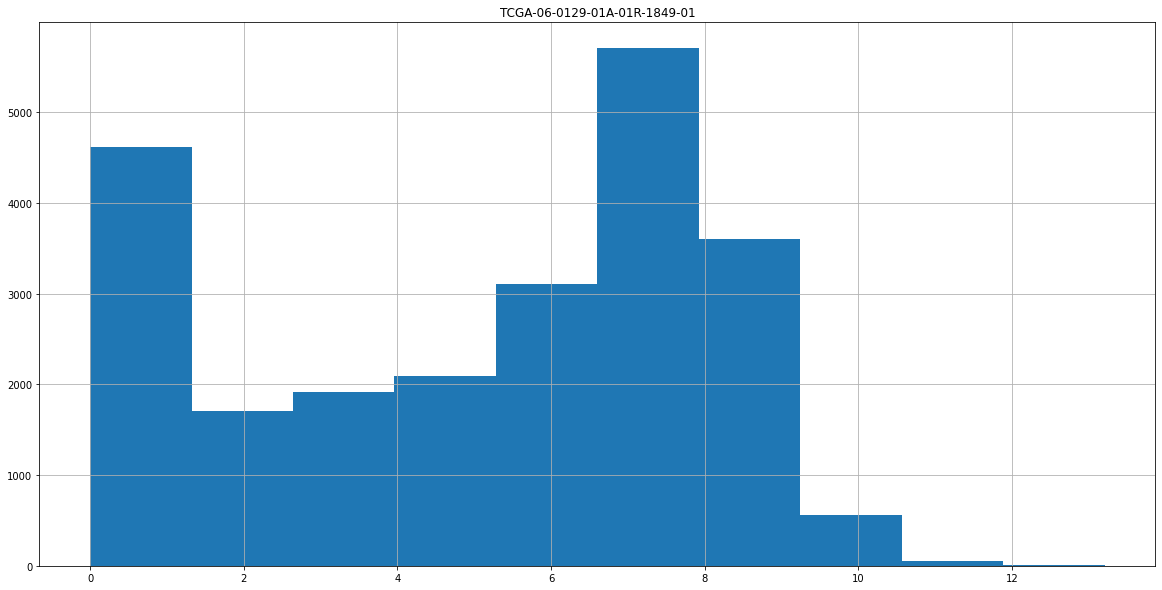

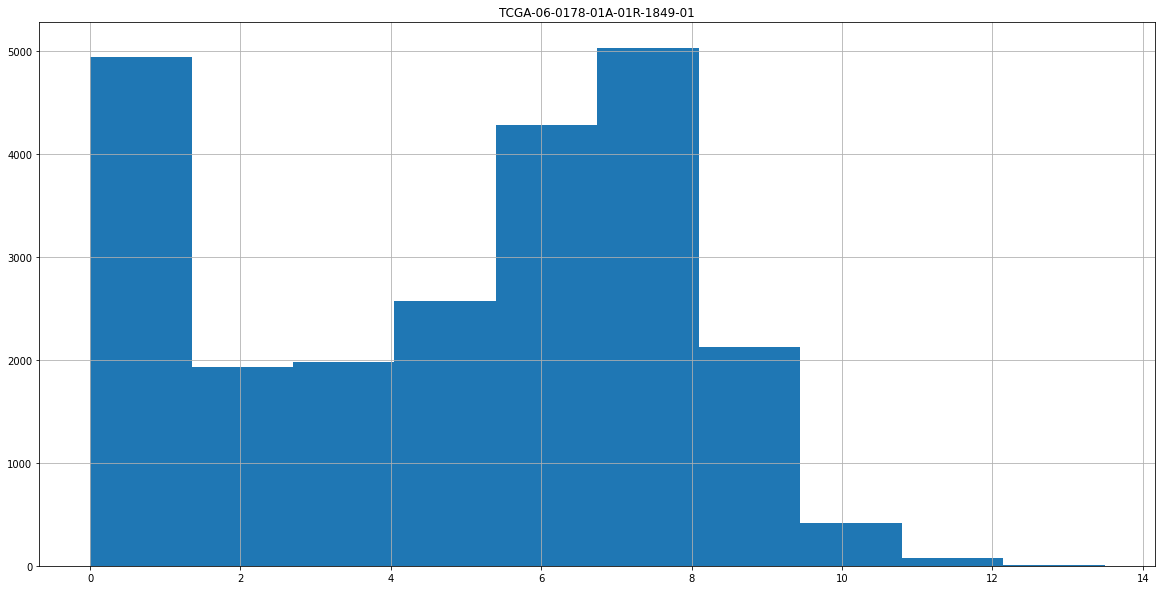

In [29]:
first_five_samples = sample_names[:5]

for sample in first_five_samples:
  log_transformed_data.hist(column=sample)

## **Question 3 e)**

In [30]:
quant_norm_data = log_transformed_data.copy() #creating a copy of log_transformed_data so that we can use this 
quant_norm_data_sorted = quant_norm_data.copy() #created a copy so that I can sort each column (wanted to preserve the OG copy in case we need that later)

quant_norm_data_sorted = pd.DataFrame(np.sort(quant_norm_data_sorted.values, axis=0), index=quant_norm_data_sorted.index, columns=quant_norm_data_sorted.columns)
#sort each column in descending order

In [31]:
quant_norm_data_sorted = quant_norm_data_sorted.drop(['Unnamed: 0'], axis=1) #drop the column where the gene names are listed (doing this so the mean calculation function doesn't throw an error with string input)

In [32]:
quant_norm_data_sorted['Mean_Quantile'] = quant_norm_data_sorted.mean(axis=1) #add a column called Mean_Quantile that has the row wise means calculated

In [33]:
quant_norm_data_sorted #print dataset to verify

,TCGA-02-2483-01A-01R-1849-01,TCGA-02-2485-01A-01R-1849-01,TCGA-02-2486-01A-01R-1849-01,TCGA-06-0129-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-06-0184-01A-01R-1849-01,TCGA-06-0644-01A-02R-1849-01,TCGA-06-0645-01A-01R-1849-01,TCGA-06-0646-01A-01R-1849-01,TCGA-06-0686-01A-01R-1849-01,...,TCGA-32-2615-01A-01R-1850-01,TCGA-32-2616-01A-01R-1850-01,TCGA-32-2632-01A-01R-1850-01,TCGA-41-2571-01A-01R-1850-01,TCGA-41-2572-01A-01R-1850-01,TCGA-41-4097-01A-01R-1850-01,TCGA-76-4927-01A-01R-1850-01,TCGA-76-4928-01B-01R-1850-01,TCGA-76-4931-01A-01R-1850-01,Mean_Quantile
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,11.918909,12.059048,12.965068,12.046319,12.544358,12.690882,12.676605,12.958173,12.348432,12.551779,...,12.560136,12.284752,12.530945,12.656807,12.256041,12.516204,12.300074,12.645612,12.086826,12.410120
23364,12.227432,12.096692,12.969472,12.127622,12.750759,13.020037,12.712245,13.01067,12.915792,12.979139,...,12.654911,12.583773,12.534187,12.784375,12.532663,12.615427,12.36716,12.806742,12.264633,12.551768
23365,12.266399,12.490823,13.553439,12.196712,12.853014,13.064634,12.82111,13.243959,12.96678,12.998128,...,12.985973,12.941004,12.547381,12.80754,12.969993,12.765311,12.684357,12.816511,12.448231,12.754482
23366,12.373038,12.98169,13.624273,12.392775,13.206205,13.291403,12.850497,13.346973,13.198149,13.087063,...,13.494405,13.060764,13.173786,12.821369,13.287648,13.71719,13.107941,12.973363,12.684023,13.073420


In [34]:
mean_quantiles = list(quant_norm_data_sorted['Mean_Quantile'].values)

In [35]:
for sample in sample_names:
  rankedVals = (rankdata(list(quant_norm_data[sample].values)) - 1).astype(int)
  for i in range(0, len(mean_quantiles)):
    rank = rankedVals[i]
    quant_norm_data.loc[i, sample]= mean_quantiles[rank]


In [36]:
quant_norm_data

,Unnamed: 0,TCGA-02-2483-01A-01R-1849-01,TCGA-02-2485-01A-01R-1849-01,TCGA-02-2486-01A-01R-1849-01,TCGA-06-0129-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-06-0184-01A-01R-1849-01,TCGA-06-0644-01A-02R-1849-01,TCGA-06-0645-01A-01R-1849-01,TCGA-06-0646-01A-01R-1849-01,...,TCGA-32-1980-01A-01R-1850-01,TCGA-32-2615-01A-01R-1850-01,TCGA-32-2616-01A-01R-1850-01,TCGA-32-2632-01A-01R-1850-01,TCGA-41-2571-01A-01R-1850-01,TCGA-41-2572-01A-01R-1850-01,TCGA-41-4097-01A-01R-1850-01,TCGA-76-4927-01A-01R-1850-01,TCGA-76-4928-01B-01R-1850-01,TCGA-76-4931-01A-01R-1850-01
0,1/2-SBSRNA4,4.002826,3.501283,3.650698,4.189883,5.394772,3.624813,4.123331,3.418422,4.281384,...,3.308890,3.801263,3.298056,3.596388,4.227980,4.137843,3.959770,3.737652,3.970294,4.001943
1,A1BG,6.521416,5.035708,5.612631,5.570737,8.006490,5.656909,6.409449,6.090795,6.025594,...,5.743245,6.582564,6.509797,5.273729,7.201496,7.283977,5.950788,5.966653,5.502850,4.577532
2,A1BG-AS1,4.002826,3.266134,3.612501,4.224647,4.238155,3.180531,4.080690,3.730690,3.850551,...,4.101050,4.366435,4.541279,2.991667,4.577532,4.793233,4.022800,3.446548,3.138494,3.210240
3,A1CF,0.721516,0.655698,0.876029,1.276423,1.527955,0.655698,1.630817,1.072128,0.876029,...,0.935391,1.285065,1.047945,0.634010,1.828642,1.339734,1.066527,0.857989,1.138893,0.971117
4,A2LD1,4.569855,5.672374,6.091901,4.528690,4.759282,5.630298,6.040962,5.193644,5.816718,...,5.239994,5.200421,6.063625,6.097266,4.716861,6.363060,5.287308,5.829943,5.246541,5.543062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,ZYG11B,7.884547,7.762720,7.352054,8.059036,7.881088,7.406062,7.294823,7.560024,7.741404,...,7.905332,7.539529,7.625934,7.427528,7.703089,7.836261,7.559103,7.687619,7.532102,7.773526
23364,ZYX,9.412406,9.398418,9.650296,9.276658,8.837580,9.773675,10.288209,10.326588,9.977470,...,9.151535,9.540235,10.796056,9.249277,9.687413,10.379909,9.390689,9.796576,10.569152,9.884673
23365,ZZEF1,7.536777,7.840430,7.314224,8.420659,6.798169,7.290370,7.597961,7.778943,8.398171,...,7.662595,8.019302,7.525097,7.650686,8.291853,7.778486,8.242805,8.012579,7.785251,8.196975
23366,ZZZ3,7.345413,7.353856,7.156559,7.792148,7.377263,7.164861,7.368824,7.006347,7.215007,...,7.034688,7.324793,7.513720,6.970900,6.534016,6.859724,7.185451,7.152771,7.076348,7.138473


In [37]:
quant_norm_data.to_csv(r'/content/drive/Shareddrives/CSCI5461 Homework/HW1_CSCI5461_Spring2023/quant_normalized_data.csv', encoding='utf-8')

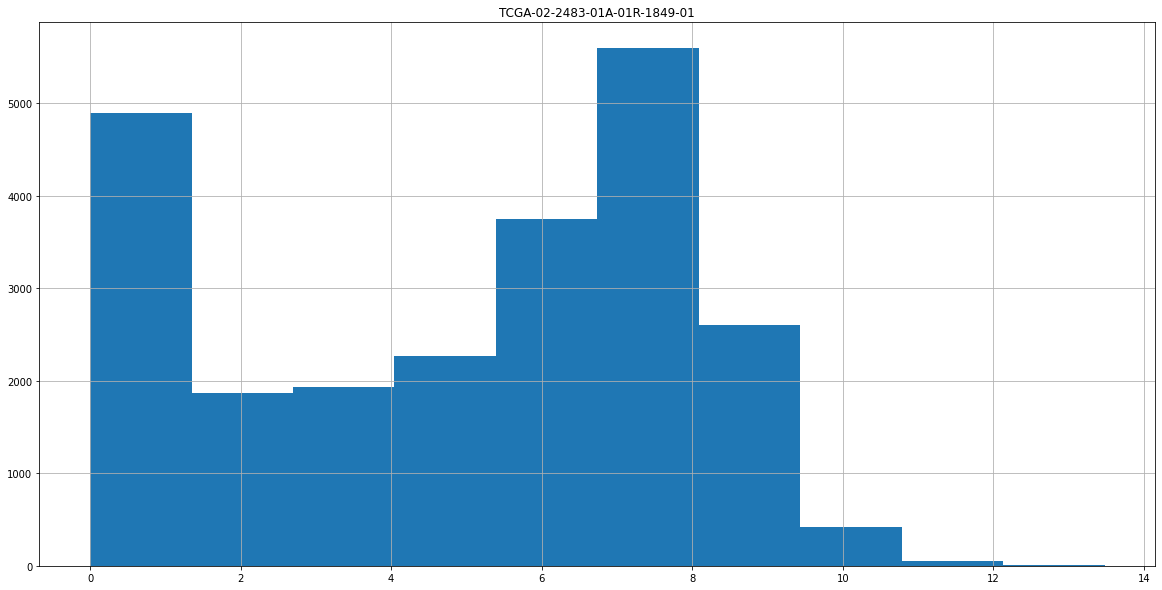

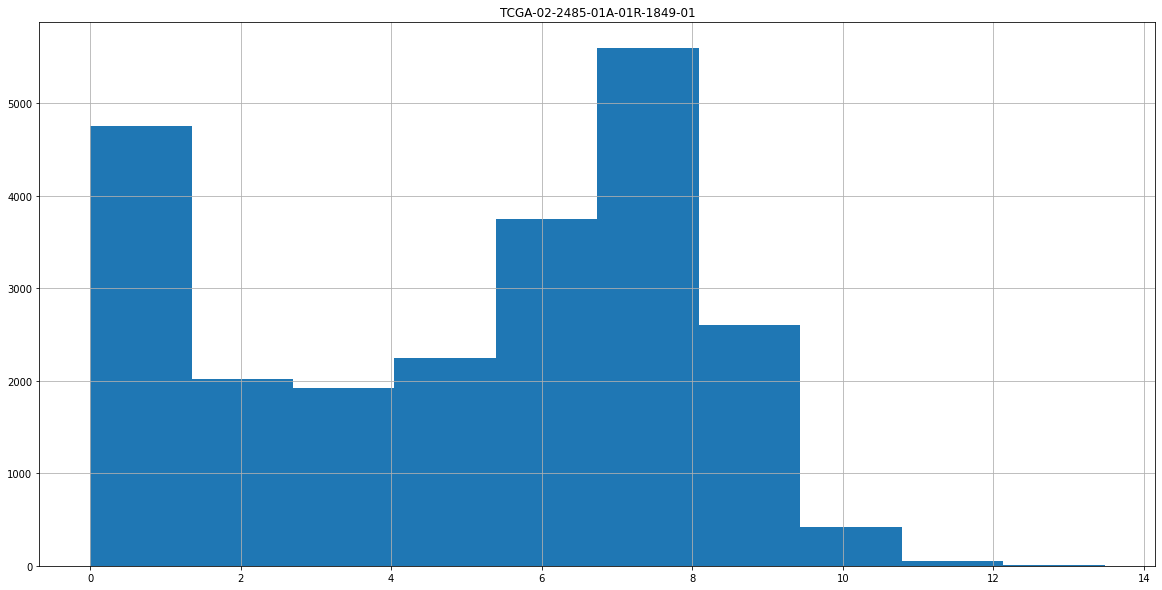

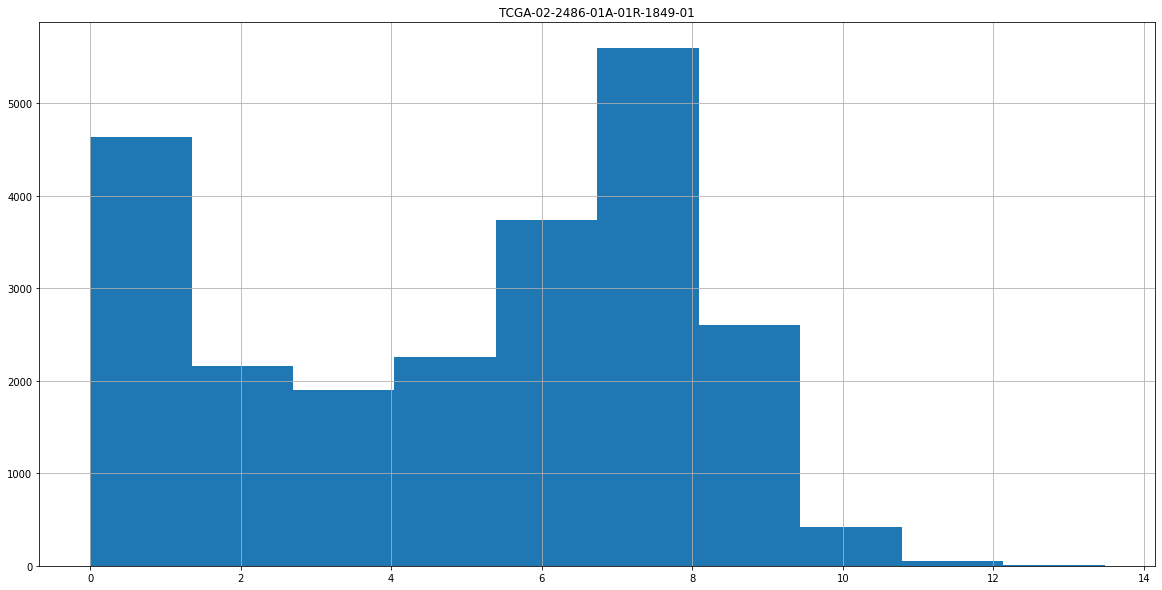

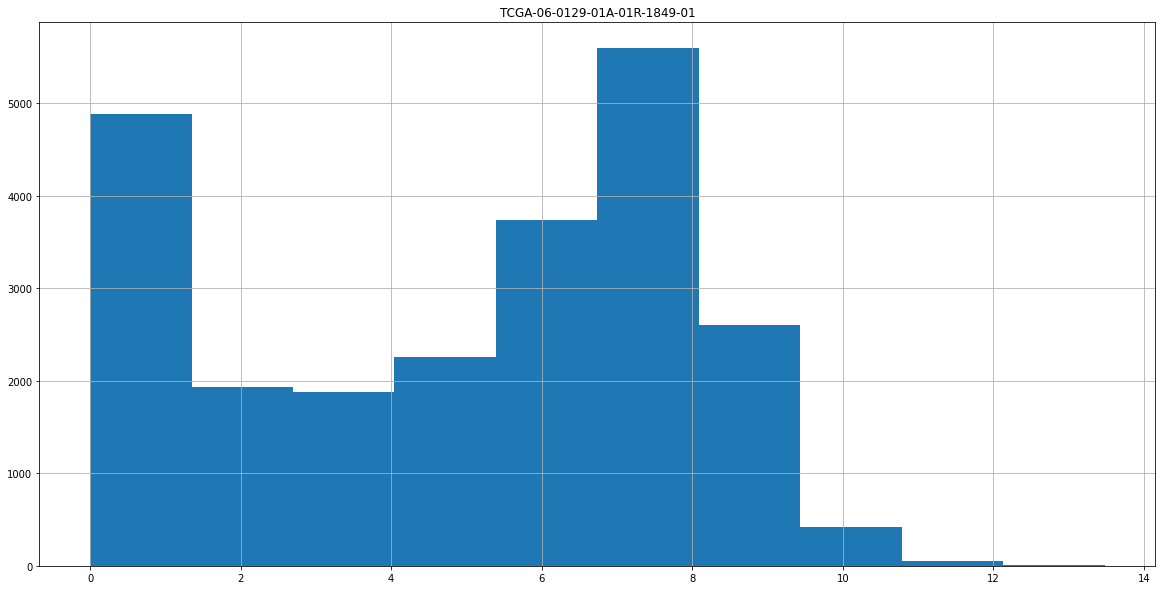

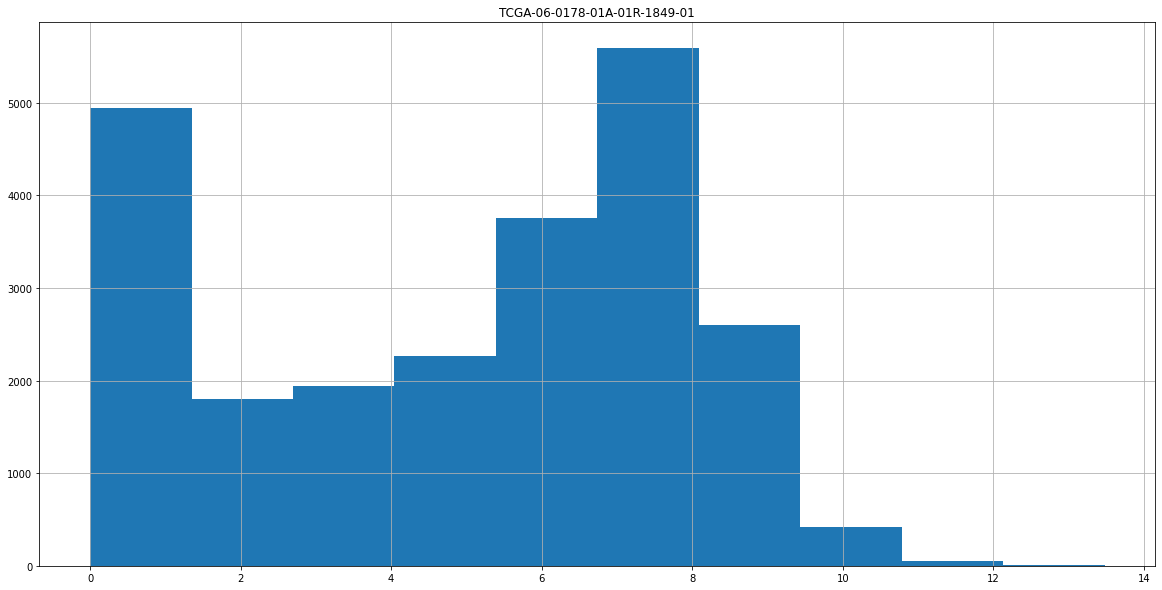

In [38]:
for sample in first_five_samples:
  quant_norm_data.hist(column=sample)

## **Question 4 a)**

In [39]:
#importing rank sum test
from scipy.stats import ranksums

In [40]:
short_term_sample_names = short_term_patients['sampleName'].tolist()
long_term_sample_names = long_term_patients['sampleName'].tolist()
short_term_sample_names.append("Unnamed: 0")
long_term_sample_names.append("Unnamed: 0")

In [41]:
short_term_gene_expressions = quant_norm_data[quant_norm_data.columns & short_term_sample_names]
long_term_gene_expressions = quant_norm_data[quant_norm_data.columns & long_term_sample_names]

<ipython-input-41-7d51479edb74>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  short_term_gene_expressions = quant_norm_data[quant_norm_data.columns & short_term_sample_names]
<ipython-input-41-7d51479edb74>:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  long_term_gene_expressions = quant_norm_data[quant_norm_data.columns & long_term_sample_names]


In [42]:
rank_test_results = pd.DataFrame(columns = ['Gene Name', 'Statistic', 'pvalue'])

for i in range(len(quant_norm_data)):
  
  gene_name = quant_norm_data.loc[i, "Unnamed: 0"]

  short_term_gene_data = short_term_gene_expressions[(short_term_gene_expressions["Unnamed: 0"] == gene_name )].values.flatten().tolist()[1:]
  long_term_gene_data = long_term_gene_expressions[(long_term_gene_expressions["Unnamed: 0"] == gene_name )].values.flatten().tolist()[1:]

  rank_sum = ranksums(short_term_gene_data, long_term_gene_data)


  rank_test_results = rank_test_results.append({'Gene Name': gene_name, 'Statistic': rank_sum[0], 'pvalue': rank_sum[1]}, ignore_index=True)

In [43]:
rank_test_results = rank_test_results.sort_values(by = 'pvalue', ascending=True)

In [44]:
rank_test_results.head(10)

,Gene Name,Statistic,pvalue
9071,KCTD3,4.618506,0.000004
16607,PRPF40A,4.273383,0.000019
3248,CDC73,4.264348,0.000020
20944,TMEM191A,-3.960785,0.000075
15858,PIK3CA,3.805389,0.000142
13,AACS,-3.702394,0.000214
22365,WFDC2,-3.695166,0.000220
18175,SCYL3,3.606627,0.000310
8858,ITPKA,-3.583137,0.000339
4706,DDX59,3.570488,0.000356


## **Question 4 b)**

In [45]:
rank_test_results_sig = rank_test_results[rank_test_results['pvalue'] < 0.05]

In [46]:
len(rank_test_results_sig)

1573

## **Question 4 c)**

In [47]:
de_seq_data = pd.read_csv(de_seq_file)

In [48]:
de_seq_data_sig = de_seq_data[de_seq_data['pvalue'] < 0.05]

In [49]:
de_seq_data_sig

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue
7,A2MP1,5.615631,-0.460540,0.196549,-2.343131,0.019123
13,AACS,990.593225,0.258326,0.067274,3.839919,0.000123
27,AASDH,629.966411,-0.207657,0.078671,-2.639574,0.008301
31,AATK,1142.016033,0.486404,0.211249,2.302519,0.021306
40,ABCA2,7608.961317,0.327225,0.147102,2.224470,0.026117
...,...,...,...,...,...,...
22599,ZNHIT1,5243.741164,0.310900,0.116420,2.670507,0.007574
22647,ZUFSP,377.036681,-0.192416,0.070690,-2.721958,0.006490
22648,ZW10,740.069586,-0.150520,0.055732,-2.700784,0.006918
22654,ZYG11A,9.882854,-0.539322,0.255851,-2.107953,0.035035


In [50]:
de_seq_data_sig = de_seq_data_sig.drop(['baseMean', 'log2FoldChange', 'lfcSE', 'stat'], axis=1)

In [51]:
de_seq_data_sig.rename(columns={'Unnamed: 0': 'Gene Name'}, inplace=True)

In [52]:
int_df = pd.merge(rank_test_results_sig, de_seq_data_sig, how ='inner', on =['Gene Name'])

In [53]:
int_df

,Gene Name,Statistic,pvalue_x,pvalue_y
0,KCTD3,4.618506,0.000004,0.000007
1,PRPF40A,4.273383,0.000019,0.000079
2,CDC73,4.264348,0.000020,0.000438
3,TMEM191A,-3.960785,0.000075,0.000075
4,PIK3CA,3.805389,0.000142,0.003401
...,...,...,...,...
1005,LOC283070,-1.962323,0.049725,0.006281
1006,TTC9,-1.962323,0.049725,0.024611
1007,MUSTN1,-1.960516,0.049935,0.011712
1008,BBS2,1.960516,0.049935,0.034602


In [54]:
int_df.to_csv(r'/content/drive/Shareddrives/CSCI5461 Homework/HW1_CSCI5461_Spring2023/overlapping_genes.csv', encoding='utf-8')

## **Question 5a)**

In [57]:
numGenes = len(de_seq_data)
alpha_adjusted = 0.05/numGenes

In [58]:
alpha_adjusted

2.206531332744925e-06

In [59]:
de_seq_data_sig_adjusted = de_seq_data[de_seq_data['pvalue'] < alpha_adjusted]

In [60]:
len(de_seq_data_sig_adjusted)

20

## **Question 5b)**

In [61]:
sorted_de_seq_2 = de_seq_data.sort_values(by = 'pvalue', ascending=True)
sorted_de_seq_2 = sorted_de_seq_2.reset_index(drop=True)

In [62]:
def bh_step_up():
  for i in range(len(sorted_de_seq_2)):
    p_val = sorted_de_seq_2['pvalue'].iloc[i]
    # print(p_val)
    # print((i/numGenes)*0.05)
    if p_val <= ((i+1)/numGenes)*0.05:
      pass
    else: 
      return(i)
  return

In [63]:
bh_step_up()

264

## **Question 5c)**

In [64]:
x_axis = list(range(501))

In [65]:
first_500_p_vals = sorted_de_seq_2['pvalue'].tolist()[:501]

In [66]:
bh_threshold = []

for i in range(len(first_500_p_vals)):
  threshold = (i/numGenes)*0.05
  bh_threshold.append(threshold)

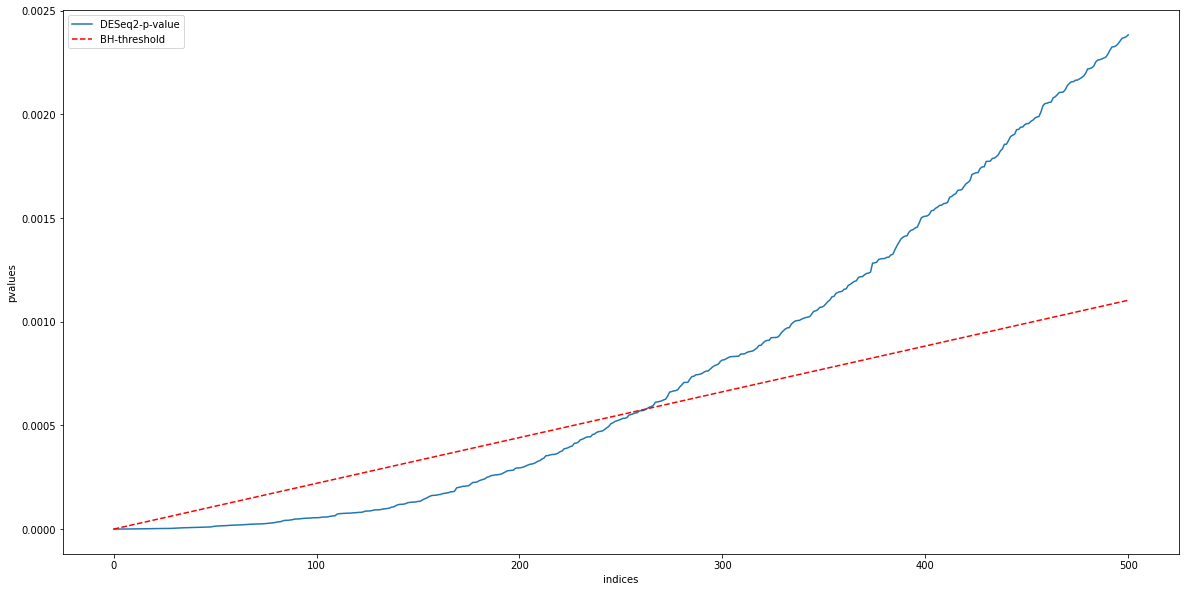

In [67]:
plt.plot(x_axis, first_500_p_vals, label="DESeq2-p-value")
plt.plot(x_axis, bh_threshold, 'r--', label="BH-threshold")
# plt.title('unemployment rate vs year')
plt.xlabel('indices')
plt.ylabel('pvalues')
plt.legend(loc="upper left")
plt.show()